In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create syntetic data 
Lx = 100
Ly = 100
Lz = 100

Nx = 20
Ny = 20
Nz = 20

N = 100
dt = 1

x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
z = np.linspace(0, Lz, Nz)

t = np.linspace(0,(N+1)*dt,N)

X, Y, Z = np.meshgrid(x, y, z)

t0 = 0
omega = 10

u0 = np.ones_like(X)
v0 = np.ones_like(X)*np.sin(Y*2*np.pi/Ly)#*np.cos(X*2*np.pi/Lx-t0/omega)
w0 = np.ones_like(X)*0.01*np.sin(Z*8*np.pi/Lz)


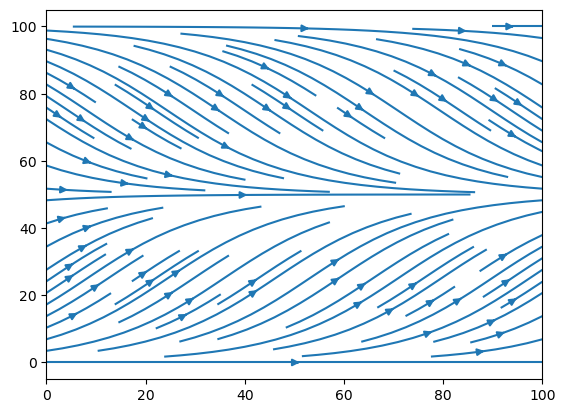

In [3]:
# plot initial velocity field
fig, ax = plt.subplots()

k = int(Nz/2)

ax.streamplot(X[:,:,k], Y[:,:,k], u0[:,:,k], v0[:,:,k])  

In [9]:
# evolve velocity in time
u = np.expand_dims(u0, axis=-1)
v = np.expand_dims(v0, axis=-1)
w = np.expand_dims(w0, axis=-1)

u = np.tile(u, (1,1,1,N))
v = np.tile(v, (1,1,1,N))
w = np.tile(w, (1,1,1,N))

for n, t_ in enumerate(t):
    v[:,:,:,n] *= np.cos(X*2*np.pi/Lx-t_*2*np.pi/omega)*np.tanh(t_/3)
    u[:,:,:,n] *= np.tanh(t_/3)
    
    u[:,:,:,n] += (np.random.random_sample(X.shape)-0.5)*1e-1
    v[:,:,:,n] += (np.random.random_sample(X.shape)-0.5)*1e-1
    w[:,:,:,n] += (np.random.random_sample(X.shape)-0.5)*1e-3

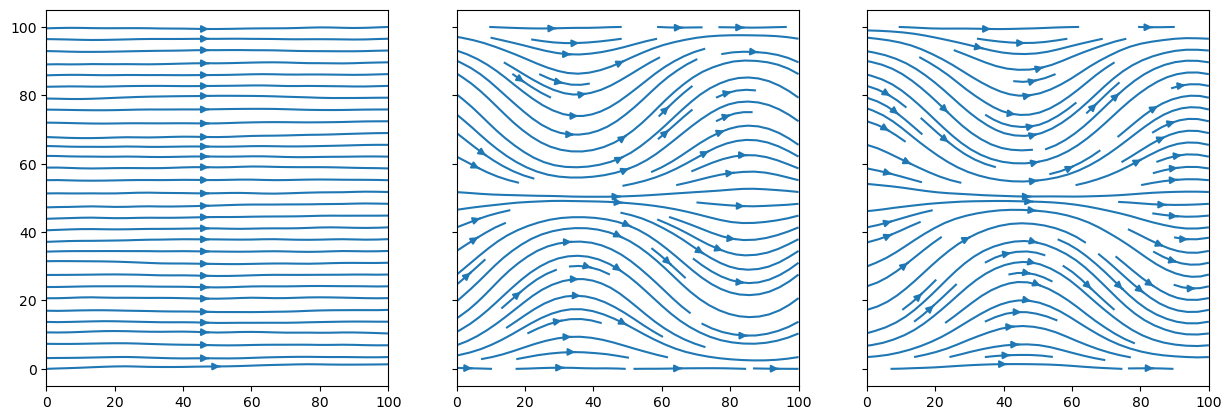

In [10]:
# plot velocity field for some time steps
 
ns = [0, 1, 2]
fig, axes = plt.subplots(1, len(ns), sharex=True, sharey=True, figsize = (15,20))
k = int(Nz/2)

for n, ax in zip(ns, axes.flatten()):
    ax.streamplot(X[:,:,k], Y[:,:,k], u[:,:,k,n], v[:,:,k,n])  
    ax.set_aspect("equal")

In [12]:
# save as netCDF 
ds = xr.Dataset(
    data_vars = dict(
        u = (["x", "y", "z", "t"], u),
        v = (["x", "y", "z", "t"], v),
        w = (["x", "y", "z", "t"], w),
    ),
    coords = dict(
        x = x,
        y = y,
        z = z,
        t = t
    )
)

ds.to_netcdf("synthetic_data.nc")